# AMP SQUID signal decimation

## Test du filtre défini par Yann

### 14/06/2023 

In [159]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# constants
frow=6.25e6

npts = 2**23
time = np.arange(npts)/frow

In [161]:
def mk_white_noise(npts):
    r"""
    This function returns an array containing a white noise.
    
    Parameters
    ----------
    npts : integer
        The length of the comb array
              
    Output
    ------
    noise : numpy array
        The test signal

    """
    
    return(np.random.rand(npts))


In [162]:
###################################################
# Definition of spectrum analyser function
###################################################
def mk_spectrum(signal, ax, f_sampling=6.25e6, title='', xlabel='', ylabel=''):
    r"""
    This function plots the spectrum of the input signal

    Parameters
    ----------
    signal : numpy array
        Input signal (time domain)
        
    ax : plot
        
    f_sampling : float
        The sampling frequency of the input signal in Hz (Default = 6.25e6)
        
    title : string
        The title of the plot
        
    """

    # Computing spectrum    
    npts = len(signal)
    signal_f = np.abs(np.fft.fft(signal, norm="forward")[0:int(npts/2)])
    signal_f_db = 20*np.log10(signal_f)

    # Frequency array
    f = np.arange(int(npts/2))*(f_sampling/npts) 
    
    # Ploting spectrum
    #fig = plt.figure(figsize=(10, 8))
    #ax = fig.add_subplot(1, 1, 1)
    ax.semilogx(f, signal_f_db, 'k')
    if xlabel != '':
        ax.set_xlabel(xlabel)
    if ylabel != '':
        ax.set_ylabel(ylabel)
    ax.set_title(title)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_weight('bold')
        item.set_fontsize(14)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
    ax.set_xlim([100, 3.125e6])
    ax.set_ylim([-100, 40])
    ax.grid()    


In [163]:
m1 = 32
taps1 = [-2.57342373e-20,  8.96358117e-08,  3.07405073e-07,  5.67677642e-07,
         7.74762943e-07,  8.25442367e-07,  6.11763063e-07,  2.40636296e-08,
        -1.04580201e-06, -2.70108090e-06, -5.03662068e-06, -8.13530119e-06,
        -1.20644517e-05, -1.68723128e-05, -2.25846083e-05, -2.92012947e-05,
        -3.66935638e-05, -4.50011741e-05, -5.40301926e-05, -6.36512254e-05,
        -7.36982212e-05, -8.39679248e-05, -9.42200568e-05, -1.04178289e-04,
        -1.13532080e-04, -1.21939415e-04, -1.29030504e-04, -1.34412446e-04,
        -1.37674883e-04, -1.38396620e-04, -1.36153197e-04, -1.30525341e-04,
        -1.21108238e-04, -1.07521522e-04, -8.94198527e-05, -6.65039394e-05,
        -3.85318456e-05, -5.33037357e-06,  3.31936747e-05,  7.70425910e-05,
         1.26117452e-04,  1.80208659e-04,  2.38987587e-04,  3.01999606e-04,
         3.68658728e-04,  4.38244134e-04,  5.09898817e-04,  5.82630557e-04,
         6.55315417e-04,  7.26703919e-04,  7.95430043e-04,  8.60023104e-04,
         9.18922567e-04,  9.70495787e-04,  1.01305860e-03,  1.04489866e-03,
         1.06430132e-03,  1.06957790e-03,  1.05909590e-03,  1.03131102e-03,
         9.84800391e-04,  9.18296714e-04,  8.30722723e-04,  7.21225506e-04,
         5.89210077e-04,  4.34371650e-04,  2.56725984e-04,  5.66372153e-05,
        -1.65157428e-04, -4.07526623e-04, -6.68928217e-04, -9.47397282e-04,
        -1.24053944e-03, -1.54552987e-03, -1.85911841e-03, -2.17764089e-03,
        -2.49703710e-03, -2.81287528e-03, -3.12038331e-03, -3.41448645e-03,
        -3.68985134e-03, -3.94093612e-03, -4.16204615e-03, -4.34739488e-03,
        -4.49116920e-03, -4.58759858e-03, -4.63102732e-03, -4.61598887e-03,
        -4.53728143e-03, -4.39004375e-03, -4.16983016e-03, -3.87268382e-03,
        -3.49520693e-03, -3.03462713e-03, -2.48885882e-03, -1.85655845e-03,
        -1.13717293e-03, -3.30980138e-04,  5.60879136e-04,  1.53637863e-03,
         2.59259393e-03,  3.72570019e-03,  4.93098054e-03,  6.20284540e-03,
         7.53486277e-03,  8.91979930e-03,  1.03496720e-02,  1.18158101e-02,
         1.33089265e-02,  1.48191982e-02,  1.63363547e-02,  1.78497737e-02,
         1.93485826e-02,  2.08217650e-02,  2.22582710e-02,  2.36471294e-02,
         2.49775610e-02,  2.62390918e-02,  2.74216631e-02,  2.85157400e-02,
         2.95124136e-02,  3.04034985e-02,  3.11816218e-02,  3.18403046e-02,
         3.23740339e-02,  3.27783234e-02,  3.30497638e-02,  3.31860608e-02,
         3.31860608e-02,  3.30497638e-02,  3.27783234e-02,  3.23740339e-02,
         3.18403046e-02,  3.11816218e-02,  3.04034985e-02,  2.95124136e-02,
         2.85157400e-02,  2.74216631e-02,  2.62390918e-02,  2.49775610e-02,
         2.36471294e-02,  2.22582710e-02,  2.08217650e-02,  1.93485826e-02,
         1.78497737e-02,  1.63363547e-02,  1.48191982e-02,  1.33089265e-02,
         1.18158101e-02,  1.03496720e-02,  8.91979930e-03,  7.53486277e-03,
         6.20284540e-03,  4.93098054e-03,  3.72570019e-03,  2.59259393e-03,
         1.53637863e-03,  5.60879136e-04, -3.30980138e-04, -1.13717293e-03,
        -1.85655845e-03, -2.48885882e-03, -3.03462713e-03, -3.49520693e-03,
        -3.87268382e-03, -4.16983016e-03, -4.39004375e-03, -4.53728143e-03,
        -4.61598887e-03, -4.63102732e-03, -4.58759858e-03, -4.49116920e-03,
        -4.34739488e-03, -4.16204615e-03, -3.94093612e-03, -3.68985134e-03,
        -3.41448645e-03, -3.12038331e-03, -2.81287528e-03, -2.49703710e-03,
        -2.17764089e-03, -1.85911841e-03, -1.54552987e-03, -1.24053944e-03,
        -9.47397282e-04, -6.68928217e-04, -4.07526623e-04, -1.65157428e-04,
         5.66372153e-05,  2.56725984e-04,  4.34371650e-04,  5.89210077e-04,
         7.21225506e-04,  8.30722723e-04,  9.18296714e-04,  9.84800391e-04,
         1.03131102e-03,  1.05909590e-03,  1.06957790e-03,  1.06430132e-03,
         1.04489866e-03,  1.01305860e-03,  9.70495787e-04,  9.18922567e-04,
         8.60023104e-04,  7.95430043e-04,  7.26703919e-04,  6.55315417e-04,
         5.82630557e-04,  5.09898817e-04,  4.38244134e-04,  3.68658728e-04,
         3.01999606e-04,  2.38987587e-04,  1.80208659e-04,  1.26117452e-04,
         7.70425910e-05,  3.31936747e-05, -5.33037357e-06, -3.85318456e-05,
        -6.65039394e-05, -8.94198527e-05, -1.07521522e-04, -1.21108238e-04,
        -1.30525341e-04, -1.36153197e-04, -1.38396620e-04, -1.37674883e-04,
        -1.34412446e-04, -1.29030504e-04, -1.21939415e-04, -1.13532080e-04,
        -1.04178289e-04, -9.42200568e-05, -8.39679248e-05, -7.36982212e-05,
        -6.36512254e-05, -5.40301926e-05, -4.50011741e-05, -3.66935638e-05,
        -2.92012947e-05, -2.25846083e-05, -1.68723128e-05, -1.20644517e-05,
        -8.13530119e-06, -5.03662068e-06, -2.70108090e-06, -1.04580201e-06,
         2.40636296e-08,  6.11763063e-07,  8.25442367e-07,  7.74762943e-07,
         5.67677642e-07,  3.07405073e-07,  8.96358117e-08, -2.57342373e-20]

In [164]:
m2 = 4
taps2 = [-4.92418740e-05, -2.17321195e-05, -9.39686993e-06,  1.33631009e-05,
         3.36510421e-05,  4.13688453e-05,  2.64029196e-05, -5.74150354e-06,
        -4.33829220e-05, -6.40667690e-05, -5.49259618e-05, -1.25905476e-05,
         4.37586062e-05,  8.80205237e-05,  9.12708746e-05,  4.68717896e-05,
        -3.14880862e-05, -1.04411160e-04, -1.33868023e-04, -9.48370123e-05,
        -5.92376236e-07,  1.08529162e-04,  1.73484611e-04,  1.55929314e-04,
         5.19959663e-05, -9.11635032e-05, -2.04366379e-04, -2.21088543e-04,
        -1.23845389e-04,  5.08406891e-05,  2.15713080e-04,  2.84525733e-04,
         2.08215792e-04,  1.56744247e-05, -2.04379742e-04, -3.34569351e-04,
        -3.00010031e-04, -1.01854211e-04,  1.65406673e-04,  3.67420408e-04,
         3.87897310e-04,  2.04139490e-04, -1.03989195e-04, -3.77357592e-04,
        -4.68794061e-04, -3.12409377e-04,  2.23582415e-05,  3.69600257e-04,
         5.38006306e-04,  4.25607014e-04,  7.05567569e-05, -3.46503007e-04,
        -6.03148111e-04, -5.42125829e-04, -1.76365130e-04,  3.17233274e-04,
         6.69610657e-04,  6.74993944e-04,  2.97843952e-04, -2.78879060e-04,
        -7.50569561e-04, -8.36988381e-04, -4.56170069e-04,  2.24976038e-04,
         8.45926833e-04,  1.05120326e-03,  6.76146063e-04, -1.25400152e-04,
        -9.49700234e-04, -1.32781765e-03, -9.98125402e-04, -5.97691747e-05,
         1.02606625e-03,  1.67020791e-03,  1.45290049e-03,  3.94781692e-04,
        -1.02130593e-03, -2.04632727e-03, -2.06712000e-03, -9.42347966e-04,
         8.44762348e-04,  2.39777022e-03,  2.82974670e-03,  1.76993466e-03,
        -3.93582308e-04, -2.61397828e-03, -3.69784669e-03, -2.91210895e-03,
        -4.57308055e-04,  2.55360953e-03,  4.56258878e-03,  4.37484176e-03,
         1.81651688e-03, -2.02642954e-03, -5.26569548e-03, -6.09427878e-03,
        -3.78439117e-03,  8.27709669e-04,  5.56926378e-03,  7.95114804e-03,
         6.41189843e-03,  1.28502163e-03, -5.18050213e-03, -9.73162134e-03,
        -9.72971740e-03, -4.57119599e-03,  3.69835334e-03,  1.11512812e-02,
         1.37337962e-02,  9.40426375e-03, -5.76931187e-04, -1.17825878e-02,
        -1.85004320e-02, -1.64297305e-02, -5.17585430e-03,  1.09737499e-02,
         2.43640459e-02,  2.73203768e-02,  1.59172466e-02, -7.22308395e-03,
        -3.28939823e-02, -4.80279752e-02, -4.07704880e-02, -5.49142083e-03,
         5.38173823e-02,  1.23989847e-01,  1.86272110e-01,  2.22953781e-01,
         2.22953781e-01,  1.86272110e-01,  1.23989847e-01,  5.38173823e-02,
        -5.49142083e-03, -4.07704880e-02, -4.80279752e-02, -3.28939823e-02,
        -7.22308395e-03,  1.59172466e-02,  2.73203768e-02,  2.43640459e-02,
         1.09737499e-02, -5.17585430e-03, -1.64297305e-02, -1.85004320e-02,
        -1.17825878e-02, -5.76931187e-04,  9.40426375e-03,  1.37337962e-02,
         1.11512812e-02,  3.69835334e-03, -4.57119599e-03, -9.72971740e-03,
        -9.73162134e-03, -5.18050213e-03,  1.28502163e-03,  6.41189843e-03,
         7.95114804e-03,  5.56926378e-03,  8.27709669e-04, -3.78439117e-03,
        -6.09427878e-03, -5.26569548e-03, -2.02642954e-03,  1.81651688e-03,
         4.37484176e-03,  4.56258878e-03,  2.55360953e-03, -4.57308055e-04,
        -2.91210895e-03, -3.69784669e-03, -2.61397828e-03, -3.93582308e-04,
         1.76993466e-03,  2.82974670e-03,  2.39777022e-03,  8.44762348e-04,
        -9.42347966e-04, -2.06712000e-03, -2.04632727e-03, -1.02130593e-03,
         3.94781692e-04,  1.45290049e-03,  1.67020791e-03,  1.02606625e-03,
        -5.97691747e-05, -9.98125402e-04, -1.32781765e-03, -9.49700234e-04,
        -1.25400152e-04,  6.76146063e-04,  1.05120326e-03,  8.45926833e-04,
         2.24976038e-04, -4.56170069e-04, -8.36988381e-04, -7.50569561e-04,
        -2.78879060e-04,  2.97843952e-04,  6.74993944e-04,  6.69610657e-04,
         3.17233274e-04, -1.76365130e-04, -5.42125829e-04, -6.03148111e-04,
        -3.46503007e-04,  7.05567569e-05,  4.25607014e-04,  5.38006306e-04,
         3.69600257e-04,  2.23582415e-05, -3.12409377e-04, -4.68794061e-04,
        -3.77357592e-04, -1.03989195e-04,  2.04139490e-04,  3.87897310e-04,
         3.67420408e-04,  1.65406673e-04, -1.01854211e-04, -3.00010031e-04,
        -3.34569351e-04, -2.04379742e-04,  1.56744247e-05,  2.08215792e-04,
         2.84525733e-04,  2.15713080e-04,  5.08406891e-05, -1.23845389e-04,
        -2.21088543e-04, -2.04366379e-04, -9.11635032e-05,  5.19959663e-05,
         1.55929314e-04,  1.73484611e-04,  1.08529162e-04, -5.92376236e-07,
        -9.48370123e-05, -1.33868023e-04, -1.04411160e-04, -3.14880862e-05,
         4.68717896e-05,  9.12708746e-05,  8.80205237e-05,  4.37586062e-05,
        -1.25905476e-05, -5.49259618e-05, -6.40667690e-05, -4.33829220e-05,
        -5.74150354e-06,  2.64029196e-05,  4.13688453e-05,  3.36510421e-05,
         1.33631009e-05, -9.39686993e-06, -2.17321195e-05, -4.92418740e-05]


In [165]:
def decimate(signal, taps, m): #prends des Taps symétriques afin de coder proche du VHDL
    """
    Fonction opérant la décimation d'un signal par un facteur M en utilisant le filtre défini par Taps (FIR symétrique)
    """
    n_taps=len(taps)
    
    if len(signal)<n_taps:
        print("Erreur: Le nombre d'échantillons n'est pas suffisant vis à vis de la taille du filtre")
        return signal
       
    if n_taps%2!=0:
        print("Erreur: Le nombre de Taps n'est pas pair")
        return signal
    
    signal_out=[]
    for i,val in enumerate(signal):
        #on prends les n_taps valeurs tous les M
        if i%m==0:
            out=0
            if i+n_taps>len(signal)-1:
                break
            for j in range(int(n_taps/2)):
                #debug
                #print("indice début: ",i+j,"indice fin: ",(n_taps-1)+i-j,"indice FIR: ",j)
                #fin debug
                out+=(signal[i+j]+signal[(n_taps-1)+i-j])*taps[j]
            signal_out.append(out)
            
    return signal_out

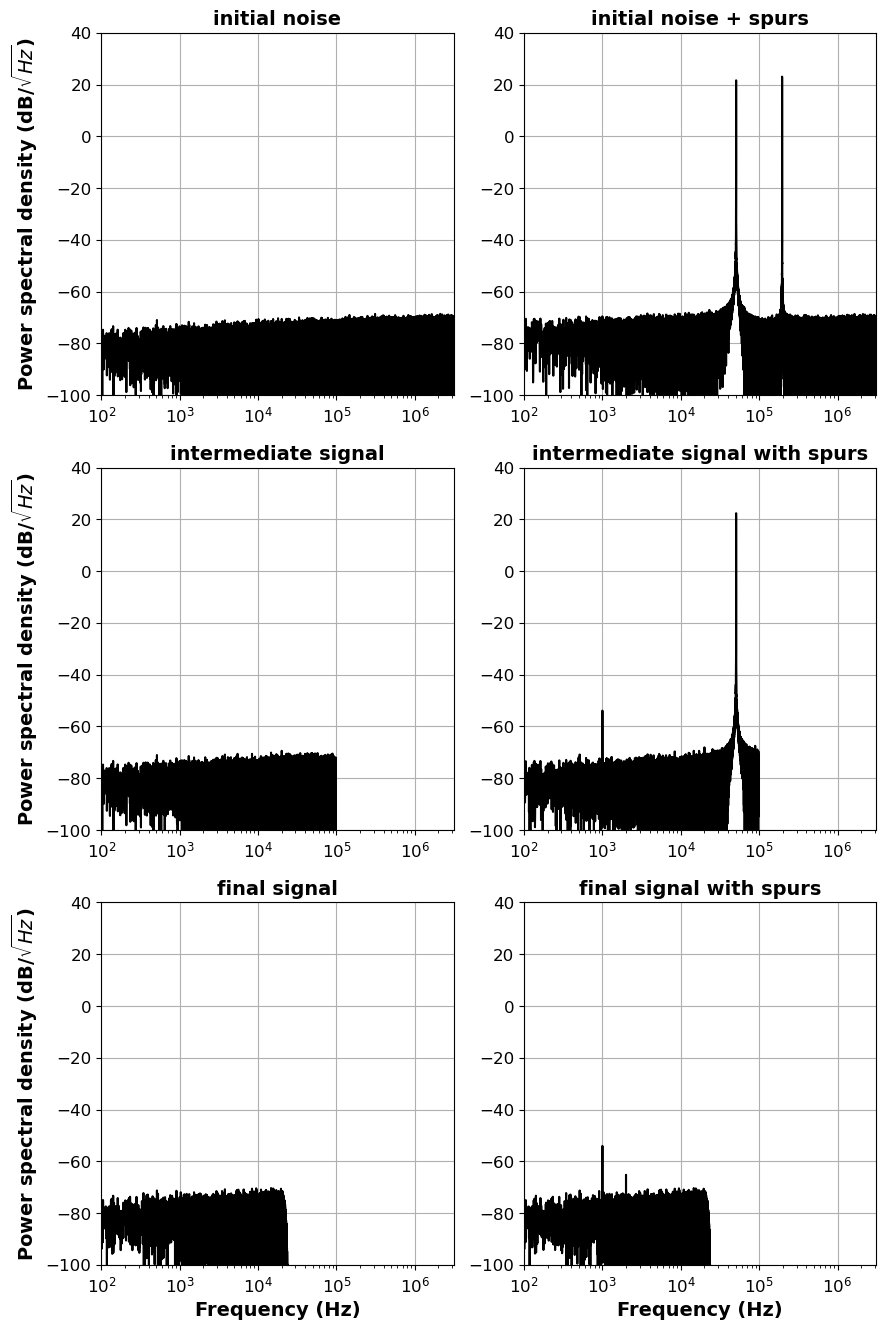

In [166]:
# Preparing plot
fig = plt.figure(figsize=(10, 16)) 
xlabel = r"Frequency (Hz)"
ylabel = r"Power spectral density (dB/$\sqrt{Hz}$)"

# Creating a noise
noise = mk_white_noise(npts)
ax1 = fig.add_subplot(3, 2, 1)
mk_spectrum(noise, ax1, f_sampling=frow, title='initial noise', ylabel=ylabel)


# Creating 2 spurious line
amp_spurs = 30
fspur1 = frow / m1 + 1e3
fspur2 = frow /(m1*m2) + 2e3
spur1 = amp_spurs*np.sin(2*np.pi*fspur1*time)
spur2 = amp_spurs*np.sin(2*np.pi*fspur2*time)
noise_spur = noise + spur1 + spur2
ax2 = fig.add_subplot(3, 2, 2)
mk_spectrum(noise_spur, ax2, f_sampling=frow, title='initial noise + spurs')


# 1st decimation
noise_filt1 = decimate(noise, taps1, m1)
ax3 = fig.add_subplot(3, 2, 3)
mk_spectrum(noise_filt1, ax3, f_sampling=frow/m1, title='intermediate signal', ylabel=ylabel)
noise_spur_filt1 = decimate(noise_spur, taps1, m1)
ax4 = fig.add_subplot(3, 2, 4)
mk_spectrum(noise_spur_filt1, ax4, f_sampling=frow/m1, title='intermediate signal with spurs')


# 2nd decimation
noise_filt2 = decimate(noise_filt1, taps2, m2)
ax5 = fig.add_subplot(3, 2, 5)
mk_spectrum(noise_filt2, ax5, f_sampling=frow/(m1*m2), title='final signal', xlabel=xlabel, ylabel=ylabel)
noise_spur_filt2 = decimate(noise_spur_filt1, taps2, m2)
ax6 = fig.add_subplot(3, 2, 6)
mk_spectrum(noise_spur_filt2, ax6, f_sampling=frow/(m1*m2), title='final signal with spurs', xlabel=xlabel)

plt.savefig('AMP_SQUID_undersampling.pdf', dpi=300, bbox_inches='tight')
